In [22]:
import matplotlib.pylab as plt
import numpy as np
import VortexPanel as vp
import BoundaryLayer as bl
%matplotlib notebook

## Project 3: Double-body AUV

#### 2D analysis of prototype AUV

![Underwater image](seabed.png)

##### Geometry

The AUV will be modelled as two symmetric hulls aligned vertically. Design an appropriate hull geometry with an aspect ratio of $c/t=8$ and a 2D block coefficient of $A/(t*c)\ge 0.8$.

<IPython.core.display.Javascript object>


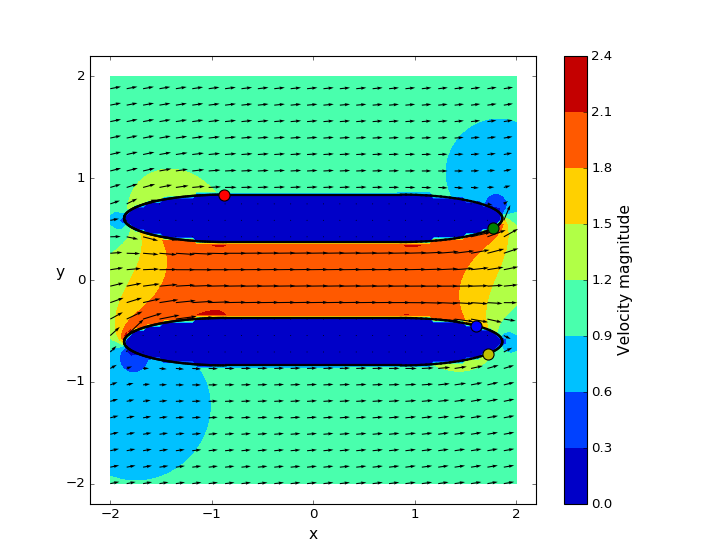

In [74]:
def make_body(N=128, ycen=0, c_t=8, Cb=0.8):
    # Calculate a bunch of parameters
    t = (Cb - 1)/((np.pi/2 - 2))
    c = c_t * t
    L = c - 2
    xcen = -L/2

    # Define the left-bottom semi-circle
    theta1 = np.linspace(0, np.pi/2, N/2 - 1)
    x1 = xcen - np.cos(theta1)
    y1 = ycen + (t / 2) * np.sin(theta1)

    # Define the right-hand semi-circle
    theta2 = np.linspace(np.pi/2, -np.pi/2, N/2 - 1)
    x2 = xcen + L + np.cos(theta2)
    y2 = ycen + (t / 2) * np.sin(theta2)
    
    # Define the left-top semi-circle
    theta3 = np.linspace(-np.pi/2, 0, N/2 - 1)
    x3 = xcen - np.cos(theta3)
    y3 = ycen + (t / 2) * np.sin(theta3)

    # Put them together
    x = np.concatenate((x1,x2,x3))
    y = np.concatenate((y1,y2,y3))


    return vp.panelize(x, y)


# def make_boat(g_c=0.2, c_t=8, Cb=0.8):
# Make a hull to measure c and t
hull1 = make_body(c_t=8, Cb=0.8)
xc, yc = hull1.get_array('xc', 'yc')
c = np.max(xc) - np.min(xc)
t = np.max(yc) - np.min(yc)

# Use c and t to make hulls in the right place
g = 0.2 * c
hull1 = make_body(ycen=(g + t) / 2, c_t=8, Cb=0.8)
hull2 = make_body(ycen=-(g + t) / 2, c_t=8, Cb=0.8)
boat = vp.concatenate(hull1, hull2)
alpha = np.pi/16
boat.solve_gamma(alpha)
boat.plot_flow()
top, bottom = hull1.split()
x_top1,y_top1 = top.sep_point()       #4. find separation on top 
x_bot1,y_bot1 = bottom.sep_point()       #   ... and bottom BL

top, bottom = hull2.split()
x_top2,y_top2 = top.sep_point()       #4. find separation on top 
x_bot2,y_bot2 = bottom.sep_point()       #   ... and bottom BL

plt.scatter(x_top1,y_top1, s=100, c='r', zorder=10)
plt.scatter(x_bot1,y_bot1, s=100, c='g', zorder=10)
plt.scatter(x_top2,y_top2, s=100, c='b', zorder=10)
plt.scatter(x_bot2,y_bot2, s=100, c='y', zorder=10)


##### Parametric study 

You will study the impact of the vertical gap between the hulls $g$ versus the hull chord $c$  while keeping the hull design fixed. Use as many values as you need to identify the trends in the range  $0.1 \le g/c \le 5$.

##### Performance metrics

Predict the total drag on the body and the tension force between the upper and lower hulls over the parameter range. Predict the added mass of the AUV when moving in $x$ and $y$ over the parameter range. Use $N=128$ second order panels and include an image of the panels and end points. 

##### Method

Explain how you met the block-coefficient condition and what modifications are required to determine the vertical force around multiple bodies. Also explain how you obtained the added mass.

##### Discussion

Discuss how you could use your results to determine the optimal $g/c$ for the AUV. Discuss what other factors might be important. Discuss the advantages and limitations of this analysis.